In [258]:
# Paso 1: Instalar medmnist
#!pip install medmnist tensorflow

# Paso 2: Importar librerías
import medmnist
from medmnist import INFO
from medmnist import ChestMNIST
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras_tuner as kt

In [247]:
#PUNTO 2 -> DISTRIBUCION PREDETERMINADA DEL DATASET
train_dataset = ChestMNIST(split='train', download=True)
val_dataset = ChestMNIST(split='val', download=True )
test_dataset = ChestMNIST(split='test', download=True)

# Convertir a arrays NumPy manualmente
x_train, y_train = train_dataset.imgs, train_dataset.labels
x_val, y_val = val_dataset.imgs, val_dataset.labels
x_test, y_test = test_dataset.imgs, test_dataset.labels

In [248]:
# Normalizar: de [0, 255] → [0, 1]
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [249]:
x_train = np.expand_dims(x_train, -1)
x_val = np.expand_dims(x_val, -1)
x_test = np.expand_dims(x_test, -1)

print("Train shape:", x_train.shape)
print("Validation shape:", x_val.shape)
print("Test shape:", x_test.shape)


Train shape: (78468, 28, 28, 1)
Validation shape: (11219, 28, 28, 1)
Test shape: (22433, 28, 28, 1)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(14, activation='sigmoid')  # MultiLabel classification
])

c:\Users\simon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [251]:
# Hiperparámetros
batch_s = 128
lr = 0.01
num_epochs = 20
optimizerf = tf.keras.optimizers.Adam(learning_rate=lr)

In [252]:
model.compile(
    optimizer=optimizerf,
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['binary_accuracy','accuracy', tf.keras.metrics.AUC]
)


In [253]:
history = model.fit(
    x_train, y_train,
    epochs=num_epochs,
    batch_size=batch_s,
    validation_data=(x_val, y_val)
)

Epoch 1/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1289 - auc_7: 0.7354 - binary_accuracy: 0.9473 - loss: 0.1895 - val_accuracy: 0.1259 - val_auc_7: 0.7636 - val_binary_accuracy: 0.9492 - val_loss: 0.1783
Epoch 2/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1215 - auc_7: 0.7518 - binary_accuracy: 0.9486 - loss: 0.1814 - val_accuracy: 0.1259 - val_auc_7: 0.7625 - val_binary_accuracy: 0.9492 - val_loss: 0.1780
Epoch 3/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1208 - auc_7: 0.7525 - binary_accuracy: 0.9486 - loss: 0.1813 - val_accuracy: 0.1259 - val_auc_7: 0.7681 - val_binary_accuracy: 0.9492 - val_loss: 0.1766
Epoch 4/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1205 - auc_7: 0.7510 - binary_accuracy: 0.9486 - loss: 0.1816 - val_accuracy: 0.1259 - val_auc_7: 0.7505 - val_binary_accuracy: 0.9492 - val_loss: 0.1807
Epoch 5/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1208 - auc_7: 0.7489 - binary_accuracy: 0.9486 - loss:

In [254]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,703,852 (6.50 MB)

 Trainable params: 567,950 (2.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,135,902 (4.33 MB)

In [279]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_binary_acc, test_acc, test_auc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f} - AUC: {test_auc:.4f} - Binary Accuracy: {test_binary_acc:.4f}")

702/702 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1204 - auc_7: 0.7458 - binary_accuracy: 0.9474 - loss: 0.1855

Test Accuracy: 0.1204 - AUC: 0.7458 - Binary Accuracy: 0.9474


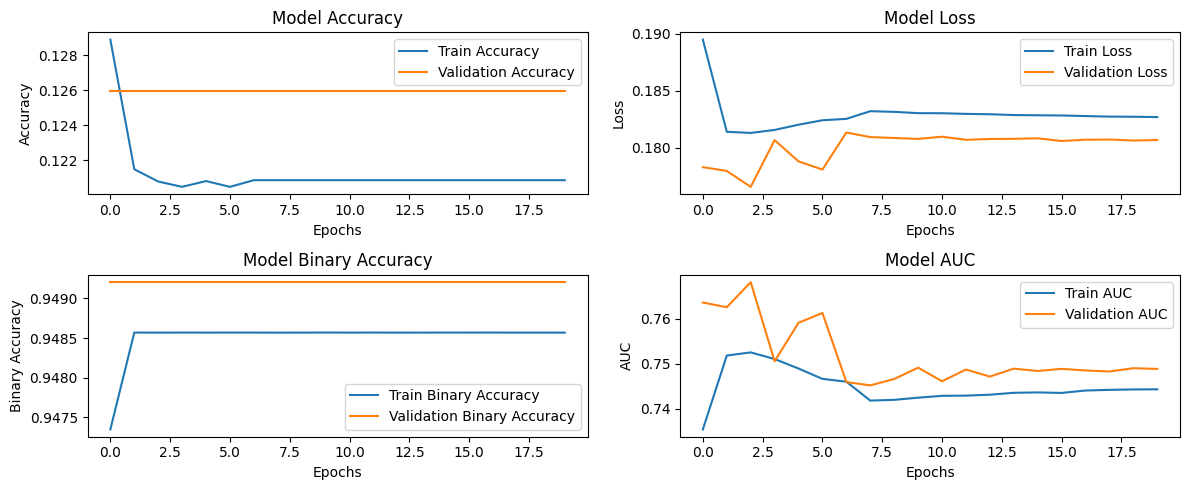

In [283]:
# Grafica de precisión y pérdida
plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(history.history['binary_accuracy'], label='Train Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Model Binary Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(history.history['auc_7'], label='Train AUC')
plt.plot(history.history['val_auc_7'], label='Validation AUC')
plt.title('Model AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))

    # Número de capas ocultas
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(tf.keras.layers.Dense(
            units=hp.Choice('units_' + str(i), [128, 256, 512]),
            activation=hp.Choice('activation_' + str(i), ['relu', 'tanh', 'sigmoid'])
        ))
        model.add(tf.keras.layers.Dropout(rate=hp.Float('dropout_' + str(i), 0.1, 0.5, step=0.1)))

    model.add(tf.keras.layers.Dense(14, activation='sigmoid'))  # Salida multi-label

    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']),
        loss='binary_crossentropy',
        metrics=['binary_accuracy','accuracy', tf.keras.metrics.AUC]
    ) #

    return model

In [265]:
#Random search
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # puedes subirlo si tienes tiempo
    executions_per_trial=1,
    directory='tuner_results',
    project_name='mlp_chestmnist'
)


In [ ]:
# Entrenamiento con búsqueda
tuner.search(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=128)

Trial 5 Complete [00h 00m 23s]
val_accuracy: 0.5368571281433105

Best val_accuracy So Far: 0.6232284307479858
Total elapsed time: 00h 02m 32s


In [290]:
best_model = tuner.get_best_models(num_models=1)[0]

history = best_model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val)
)

# Evaluar en test
test_loss, test_binary_acc, test_acc, test_auc = best_model.evaluate(x_test, y_test)
print(f"Mejor modelo: Accuracy: {test_acc:.4f} - AUC: {test_auc:.4f} - Binary Accuracy: {test_binary_acc:.4f}")
print(f"Optimizer: {best_model.optimizer.name} - Lr: {best_model.optimizer.learning_rate.numpy()}")
print(f"Activation: {best_model.layers[1].activation.__name__}")
print(f"Dropout: {best_model.layers[2].rate}")
print(f'Mejor modelo: {best_model}')
best_model.summary()


Epoch 1/20


c:\Users\simon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\simon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1851 - auc: 0.7716 - binary_accuracy: 0.9484 - loss: 0.1776 - val_accuracy: 0.1834 - val_auc: 0.7605 - val_binary_accuracy: 0.9489 - val_loss: 0.1804
Epoch 2/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1862 - auc: 0.7727 - binary_accuracy: 0.9484 - loss: 0.1773 - val_accuracy: 0.1375 - val_auc: 0.7867 - val_binary_accuracy: 0.9492 - val_loss: 0.1820
Epoch 3/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1883 - auc: 0.7742 - binary_accuracy: 0.9484 - loss: 0.1769 - val_accuracy: 0.1406 - val_auc: 0.7834 - val_binary_accuracy: 0.9492 - val_loss: 0.1883
Epoch 4/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1881 - auc: 0.7759 - binary_accuracy: 0.9484 - loss: 0.1766 - val_accuracy: 0.1259 - val_auc: 0.7631 - val_binary_accuracy: 0.9490 - val_loss: 0.1822
Epoch 5/20
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1858 - auc: 0.7756 - binary_accuracy: 0.9485 - loss: 0.1767 - val_accuracy: 0.132

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │         3,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,118 (1.56 MB)

 Trainable params: 204,558 (799.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 204,560 (799.07 KB)

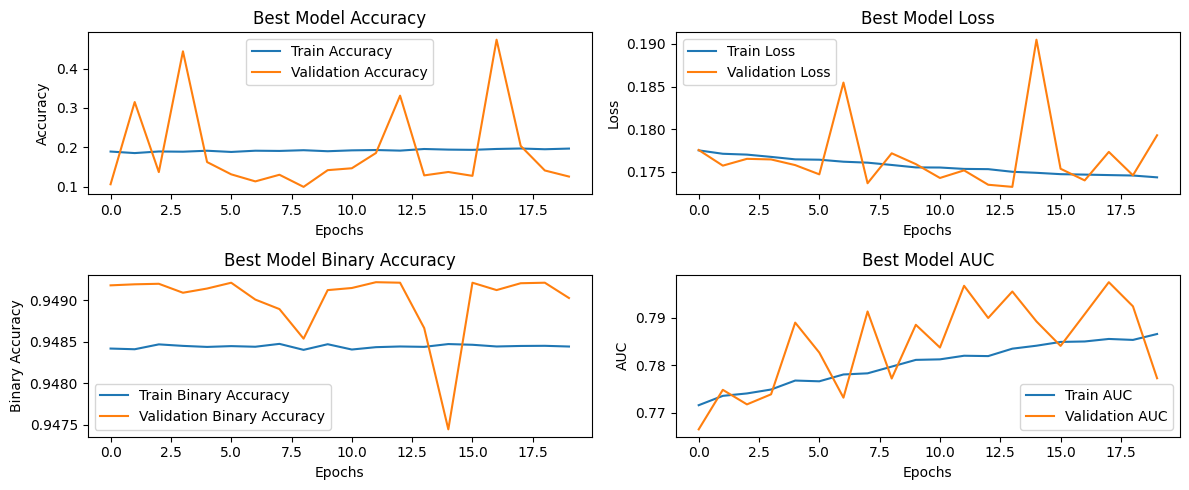

In [289]:
# Grafica de precisión y pérdida
plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Best Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Best Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(history.history['binary_accuracy'], label='Train Binary Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.title('Best Model Binary Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Best Model AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout()
plt.show()